# PH 227 Coding Assignment 2
### Name: Soham Sahasrabuddhe
### Roll Number: 23B1848

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

np.random.seed(int(time.time()))

# Question 1

Given $ B = m*A + c$ 

* For randomly generated A and B, if the correlation coefficient comes out to be $ \approx 1$, it implies equivalence relation between the datasets.

* If the non-diagonal elements of the covariance matrix $\neq 0$, implies A and B are not independent.

In [2]:
# Parameters
m = 10
c = 7

# Datasets
A = np.random.rand(20)
B = m*A + c

# Correlation Coefficient (Value 1 proves equivalence)
corr_coef = np.corrcoef(A, B)[0, 1]
print(f"Correlation Coefficient: {corr_coef:.4f}")

# Covariance Matrix (Non-zero non-diagonal elements prove dependence)
cov_matrix = np.cov(A, B)
print(f"Covariance Matrix:\n{cov_matrix}")


Correlation Coefficient: 1.0000
Covariance Matrix:
[[0.08296689 0.82966888]
 [0.82966888 8.29668877]]


# Question 2

For justification of chosen value of x it suffices to show that the cdf of the exponential distribution $\approx$ proportion of points less than x in random dataset. This can be compared by plotting the graphs for both quantities over range of x.

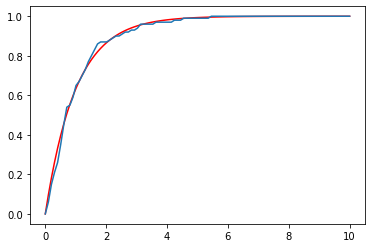

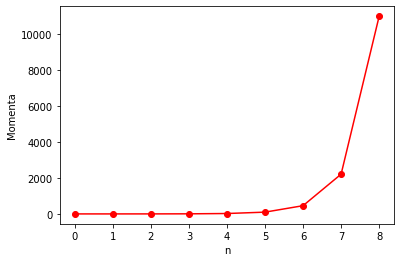

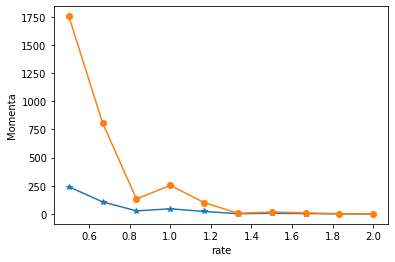

In [3]:
# Exponential Distribution
rate = 1
X = np.random.exponential(rate,100)

# CDF calculation
def cdf(rate,x):
    cdf = 1 - np.exp(-1*rate*x)
    return cdf

# Proportion in dataset
def proportion(x,X):
    prop = np.sum(X <= x) / len(X)
    return prop

x = np.linspace(0,10,100)
cdf_values = cdf(rate,x)
prop_values = [proportion(y,X) for y in x]

# Plots for cdf and proportion which are almost identical
plt.plot(x,cdf_values,c='r')
plt.plot(x,prop_values)
plt.show()


# Plotting of momenta from n=1 to 8
momenta = [1]
for i in range(1,9):
    momenta.append(np.mean(X**i))

plt.plot(momenta,c = 'r', marker ='o')
plt.xlabel('n')
plt.ylabel('Momenta')
plt.show()

# Plotting momenta for n = 4 and n = 5
rate = np.linspace(0.5,2,10)
momenta_4 = []
momenta_5 = []
for i in rate:
    X = np.random.exponential(1/i,100)
    momenta_4.append(np.mean(X**4))
    momenta_5.append(np.mean(X**5))

plt.plot(rate,momenta_4,marker='*')
plt.plot(rate,momenta_5,marker='o')
plt.xlabel('rate')
plt.ylabel('Momenta')
plt.show()

As inferred from graphs, moment value is directly proportional to n ($n!$) and is inversely proportional to the rate parameter ($\frac{1}{\lambda^n}$).

# Question 3

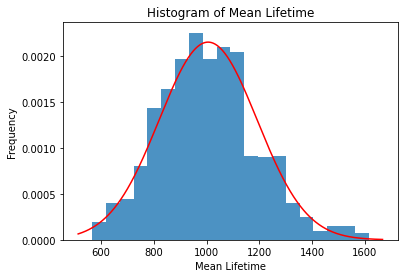

In [4]:
# Parameters
n = 10000
mean = 1000
n_samples = 1000
batch_size = 30

# Distribution of components
X = np.random.exponential(mean,n)
lifetime = []
for i in range(n_samples):
    Y = np.random.choice(X,batch_size)
    lifetime.append(np.mean(Y))

# Histogram of mean lifetime
plt.hist(lifetime,bins = 20, density=True, alpha = 0.8)

# Normal Distribution
min,max = plt.xlim()
x = np.linspace(min,max,1000)
sample_mean = np.mean(lifetime)
std_dev = np.std(lifetime)
normal = stats.norm.pdf(x,loc = sample_mean,scale = std_dev)

# Plots
plt.plot(x,normal,'r')
plt.xlabel('Mean Lifetime')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Lifetime')
plt.show()

Using this data, company can get idea what lifetime constraints it has consider, what is the ideal range, early detection of any issues etc. to maintain product quality.